# Load the heart attack dataset

In [1]:
import pandas as pd
df = pd.read_csv('./Heart_attack.csv')

df.head()

,age,sex,Chest pain type,trestbps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,70,1,4,130,322,0,2,109,0,2.4,2,2
1,67,0,3,115,564,0,2,160,0,1.6,2,1
2,57,1,2,124,261,0,0,141,0,0.3,1,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1


# Dataset shape and types

In [2]:
print(f"Dataset shape: {df.shape}")
print(f"Total patients: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (1763, 12)
Total patients: 1763
Total features: 12

Column names:
['age', 'sex', 'Chest pain type', 'trestbps', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target']


# Filling Missing values and Data quality issues

In [3]:
df.info()
df.describe()
print("Missing values:")
print(df.isnull().sum())
print("\nData quality issues (medically impossible values):")
print(f"Zero cholesterol: {(df['cholesterol'] == 0).sum()}")
print(f"Zero blood pressure: {(df['trestbps'] == 0).sum()}")
print("Target distribution:")
print(df['target'].value_counts().sort_index())
print("\nPercentage distribution:")
print(df['target'].value_counts(normalize=True).sort_index() * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1763 non-null   int64  
 1   sex                  1763 non-null   int64  
 2   Chest pain type      1763 non-null   int64  
 3   trestbps             1763 non-null   int64  
 4   cholesterol          1763 non-null   int64  
 5   fasting blood sugar  1763 non-null   int64  
 6   resting ecg          1763 non-null   int64  
 7   max heart rate       1763 non-null   int64  
 8   exercise angina      1763 non-null   int64  
 9   oldpeak              1763 non-null   float64
 10  ST slope             1763 non-null   int64  
 11  target               1763 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 165.4 KB
Missing values:
age                    0
sex                    0
Chest pain type        0
trestbps               0
cholesterol            0

# Visualize target distribution

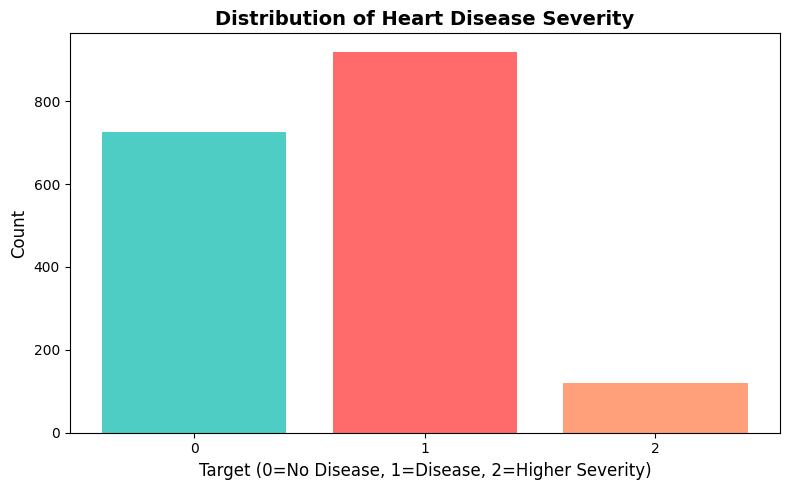

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
target_counts = df['target'].value_counts().sort_index()
plt.bar(target_counts.index, target_counts.values, color=['#4ECDC4', '#FF6B6B', '#FFA07A'])
plt.title('Distribution of Heart Disease Severity', fontsize=14, fontweight='bold')
plt.xlabel('Target (0=No Disease, 1=Disease, 2=Higher Severity)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2])
plt.tight_layout()
plt.show()

# Correlation Matrix

In [5]:
correlation_matrix = df.corr()
print("Correlation with target:")
print(correlation_matrix['target'].sort_values(ascending=False))

Correlation with target:
target                 1.000000
Chest pain type        0.387791
ST slope               0.386339
exercise angina        0.367162
oldpeak                0.353318
sex                    0.221412
age                    0.216633
resting ecg            0.141792
fasting blood sugar    0.103726
trestbps               0.101450
cholesterol           -0.044904
max heart rate        -0.280506
Name: target, dtype: float64


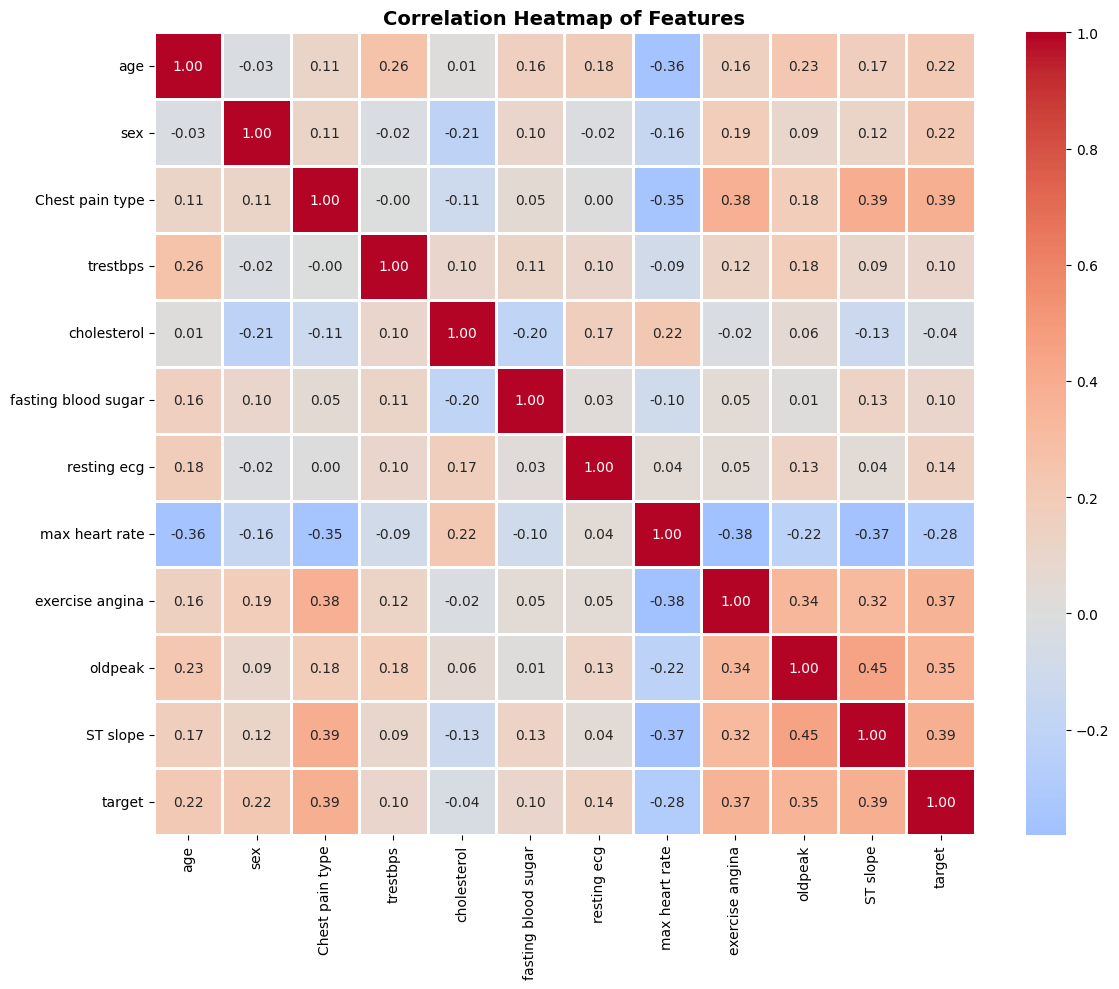

In [6]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Histogram for key features

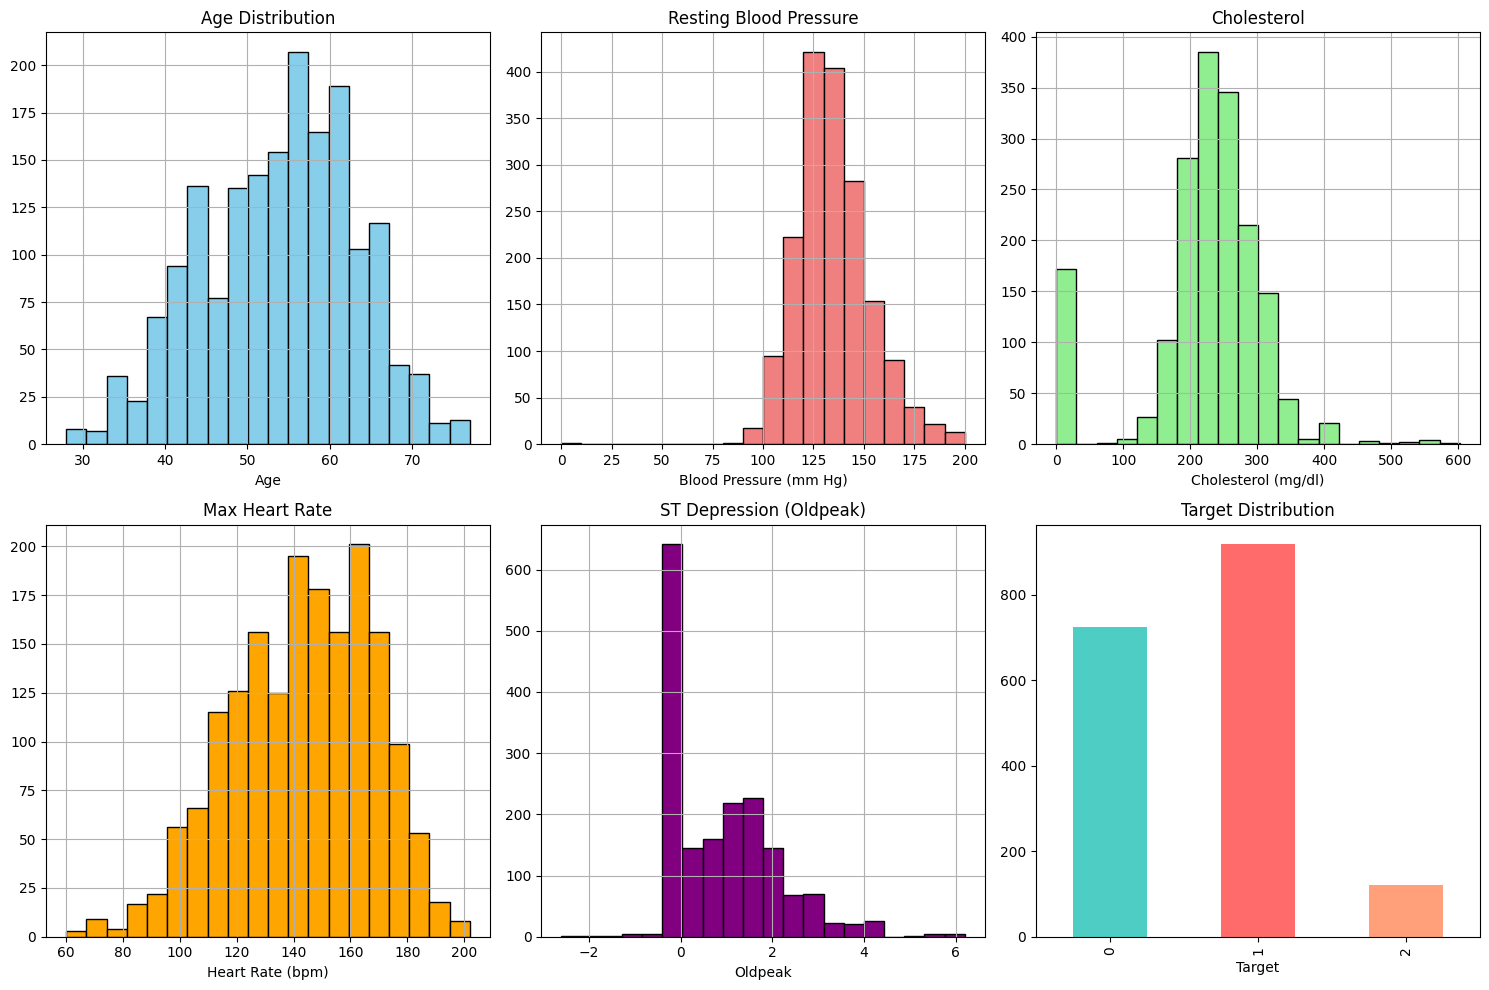

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Age distribution
df['age'].hist(bins=20, ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')

# Resting blood pressure distribution
df['trestbps'].hist(bins=20, ax=axes[0, 1], color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Resting Blood Pressure')
axes[0, 1].set_xlabel('Blood Pressure (mm Hg)')

# Cholesterol distribution
df['cholesterol'].hist(bins=20, ax=axes[0, 2], color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Cholesterol')
axes[0, 2].set_xlabel('Cholesterol (mg/dl)')

# Maximum heart rate distribution
df['max heart rate'].hist(bins=20, ax=axes[1, 0], color='orange', edgecolor='black')
axes[1, 0].set_title('Max Heart Rate')
axes[1, 0].set_xlabel('Heart Rate (bpm)')

# ST depression (Oldpeak) distribution
df['oldpeak'].hist(bins=20, ax=axes[1, 1], color='purple', edgecolor='black')
axes[1, 1].set_title('ST Depression (Oldpeak)')
axes[1, 1].set_xlabel('Oldpeak')

# Target distribution
df['target'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 2], color=['#4ECDC4', '#FF6B6B', '#FFA07A'])
axes[1, 2].set_title('Target Distribution')
axes[1, 2].set_xlabel('Target')

plt.tight_layout()
plt.show()

# Box Plots by target

This section is to provide the visualiztion for outliers

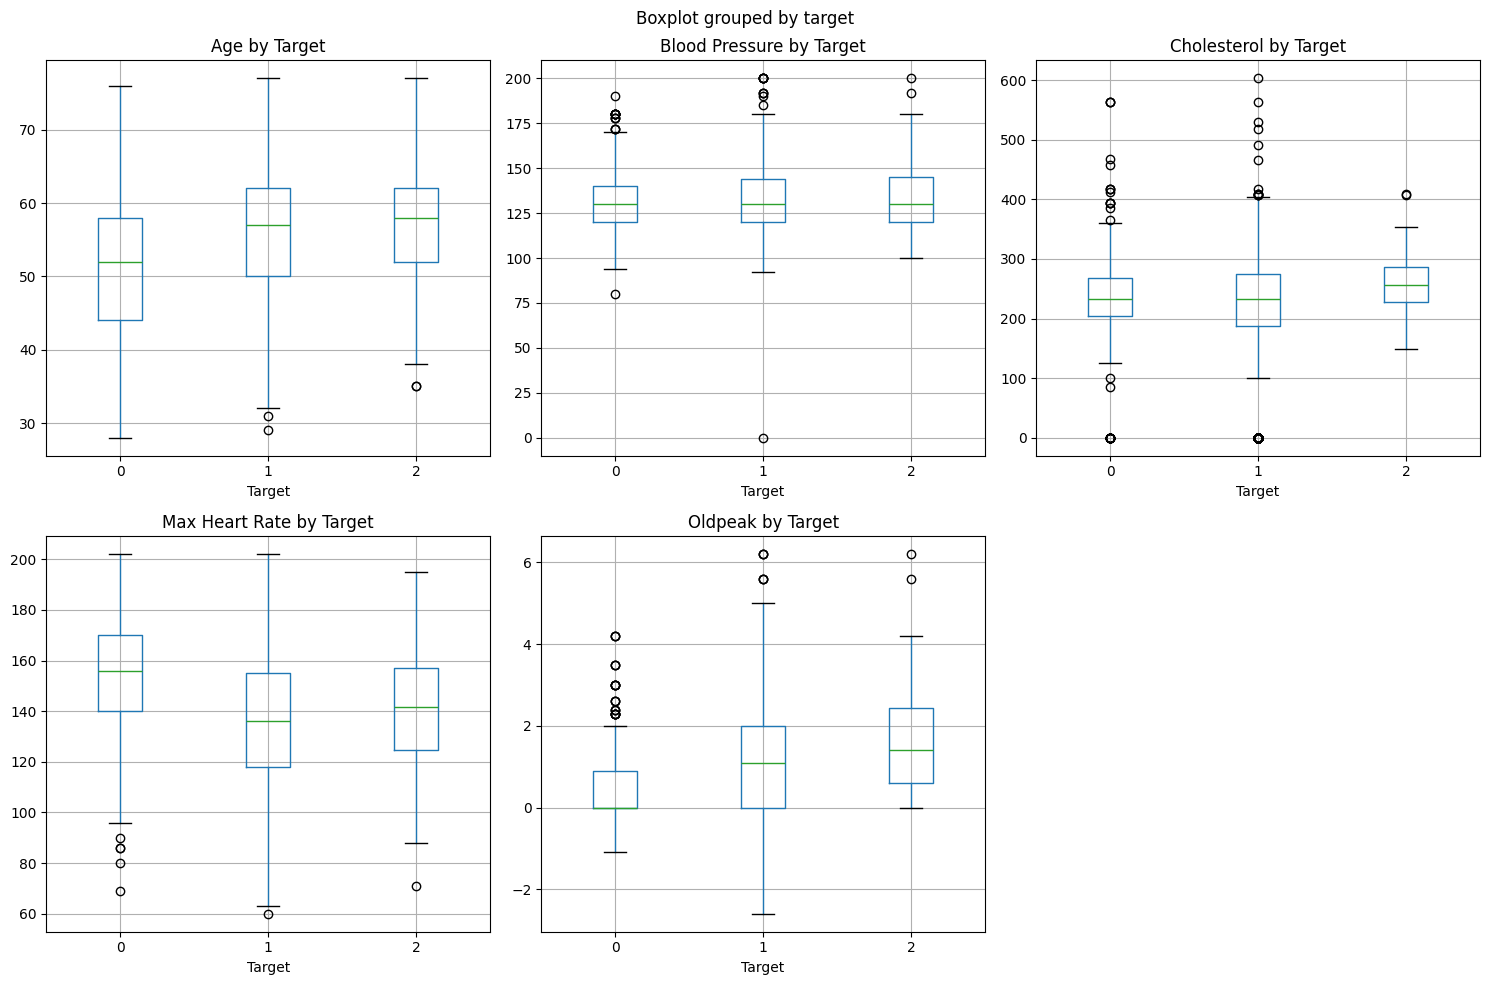

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

df.boxplot(column='age', by='target', ax=axes[0, 0])
axes[0, 0].set_title('Age by Target')
axes[0, 0].set_xlabel('Target')

df.boxplot(column='trestbps', by='target', ax=axes[0, 1])
axes[0, 1].set_title('Blood Pressure by Target')
axes[0, 1].set_xlabel('Target')

df.boxplot(column='cholesterol', by='target', ax=axes[0, 2])
axes[0, 2].set_title('Cholesterol by Target')
axes[0, 2].set_xlabel('Target')

df.boxplot(column='max heart rate', by='target', ax=axes[1, 0])
axes[1, 0].set_title('Max Heart Rate by Target')
axes[1, 0].set_xlabel('Target')

df.boxplot(column='oldpeak', by='target', ax=axes[1, 1])
axes[1, 1].set_title('Oldpeak by Target')
axes[1, 1].set_xlabel('Target')

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()


# Scatter plots

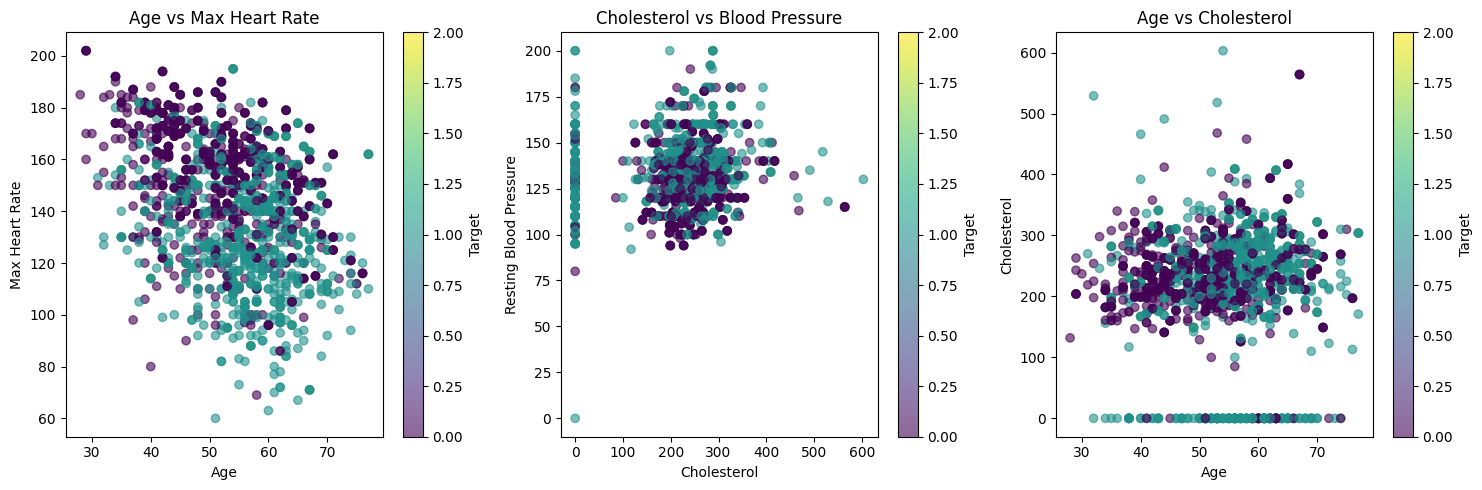

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

scatter1 = axes[0].scatter(df['age'], df['max heart rate'], c=df['target'], cmap='viridis', alpha=0.6)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Max Heart Rate')
axes[0].set_title('Age vs Max Heart Rate')
plt.colorbar(scatter1, ax=axes[0], label='Target')

scatter2 = axes[1].scatter(df['cholesterol'], df['trestbps'], c=df['target'], cmap='viridis', alpha=0.6)
axes[1].set_xlabel('Cholesterol')
axes[1].set_ylabel('Resting Blood Pressure')
axes[1].set_title('Cholesterol vs Blood Pressure')
plt.colorbar(scatter2, ax=axes[1], label='Target')

scatter3 = axes[2].scatter(df['age'], df['cholesterol'], c=df['target'], cmap='viridis', alpha=0.6)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Cholesterol')
axes[2].set_title('Age vs Cholesterol')
plt.colorbar(scatter3, ax=axes[2], label='Target')

plt.tight_layout()
plt.show()


# Data Preparation

Handling missing values

In [10]:
import numpy as np

# Create a copy for cleaning
df_clean = df.copy()

# Replace 0 cholesterol with median (0 is medically impossible)
cholesterol_median = df_clean[df_clean['cholesterol'] > 0]['cholesterol'].median()
df_clean.loc[df_clean['cholesterol'] == 0, 'cholesterol'] = cholesterol_median
print(f"Replaced {(df['cholesterol'] == 0).sum()} zero cholesterol values with median: {cholesterol_median}")

# Replace 0 blood pressure with median
if (df_clean['trestbps'] == 0).sum() > 0:
    bp_median = df_clean[df_clean['trestbps'] > 0]['trestbps'].median()
    df_clean.loc[df_clean['trestbps'] == 0, 'trestbps'] = bp_median
    print(f"Replaced zero blood pressure with median: {bp_median}")

Replaced 172 zero cholesterol values with median: 240.0
Replaced zero blood pressure with median: 130.0


Removing duplicates

In [11]:
duplicates = df_clean.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Removed {duplicates} duplicates. New shape: {df_clean.shape}")

Duplicate rows: 272
Removed 272 duplicates. New shape: (1491, 12)


# Feature Engineering

Creating new features based on domain knowledge

In [15]:
# Age groups (categorical)
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[0, 40, 55, 70, 100], labels=[0, 1, 2, 3])
df_clean['age_group'] = df_clean['age_group'].astype(int)

# BMI proxy: interaction between age and cholesterol
df_clean['age_chol_interaction'] = df_clean['age'] * df_clean['cholesterol'] / 1000

# Heart rate reserve (max heart rate relative to age)
df_clean['heart_rate_reserve'] = df_clean['max heart rate'] - (220 - df_clean['age'])

# Blood pressure category
df_clean['bp_category'] = pd.cut(df_clean['trestbps'], bins=[0, 120, 140, 200], labels=[0, 1, 2])
df_clean['bp_category'] = df_clean['bp_category'].astype(int)

# Cholesterol risk level
df_clean['chol_risk'] = pd.cut(df_clean['cholesterol'], bins=[0, 200, 240, 600], labels=[0, 1, 2])
df_clean['chol_risk'] = df_clean['chol_risk'].astype('Int64')

print("Engineered features created:")
print("- age_group: Age categories (0-40, 41-55, 56-70, 70+)")
print("- age_chol_interaction: Age-cholesterol interaction term")
print("- heart_rate_reserve: Heart rate reserve indicator")
print("- bp_category: Blood pressure risk category")
print("- chol_risk: Cholesterol risk level")


Engineered features created:
- age_group: Age categories (0-40, 41-55, 56-70, 70+)
- age_chol_interaction: Age-cholesterol interaction term
- heart_rate_reserve: Heart rate reserve indicator
- bp_category: Blood pressure risk category
- chol_risk: Cholesterol risk level


# Separate features and Target

In [17]:
X = df_clean.drop('target', axis=1)
y = df_clean['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (1491, 16)
Target shape: (1491,)


# Training Validation-Test Split 

In [18]:
from sklearn.model_selection import train_test_split

# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: 15% validation, 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df_clean)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df_clean)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df_clean)*100:.1f}%)")

Training set: 1043 samples (70.0%)
Validation set: 224 samples (15.0%)
Test set: 224 samples (15.0%)
